In [18]:
import random
import numpy as np
import pandas as pd

ARRIVAL = 0.95
SERVICE = 1

SIM_TIME = 5000

TYPE1 = 1
TYPE2 = 2

random.seed(42)

In [19]:
u_Id = 0
users = 0

# Future Event Set
FES = []
queue = []

# simulation time
time = 0

# event counter
event = 0
arrivals = 0
departures = 0

In [20]:
columns = ['event', 'time', 'type',
           'queue', 'arr cust', 'depar cust', "in line"]

In [21]:
# Client

class Client:
    def __init__(self, u_Id, type, arrival_time) -> None:
        self.u_Id = u_Id
        self.type = type
        self.arrival_time = arrival_time

    def getType(self):
        return self.type

    def getArrivalTime(self):
        return self.arrival_time

    def getId(self):
        return self.u_Id

In [22]:
def arrival(time, FES, queue):
    global users
    global u_Id
    print("ARRIVAL at time: \t{}".format(time))
    # sample time until next event
    inter_arrival = random.expovariate(1.0/ARRIVAL)
    #schedule next arrival
    FES.append((time + inter_arrival, "arrival"))
    # update state variables
    users += 1
    # create a record for the client
    client = Client(u_Id, TYPE1, time)
    u_Id += 1
    print("new CLIENT created of type [{}] at time [{}]".format(client.getType(), client.getArrivalTime()))
    # insert record in the queue
    queue.append(client)

    # if server is idle start the service
    if users == 1:
        # sample the service time
        service_time = random.expovariate(1.0/SERVICE)

        # print("new DEPARTURE scheduled at time: {}".format(time + service_time))

        # schedule when the client will finish the server
        FES.append((time + service_time, "departure"))

In [23]:
def departure(time, FES, queue):
    global users
    # get the first element from the queue
    client = queue.pop(0)
    print("CLIENT {} of type [{}] created at time [{}] departed at time [{}]".format(client.getId(), client.getType(), client.getArrivalTime(), time))
    # update state variable
    users -= 1

    # see wheather there are more clients to serve in the line
    if users > 0:
        # sample service time
        service_time = random.expovariate(1.0/SERVICE)
        # schedule when the client will finish the server
        FES.append((time + service_time, "departure"))

In [24]:
# schedule the first arrival at t=0
FES.append((time, "arrival"))

#create dataframe to store informations
df = pd.DataFrame(columns=columns)

while time < SIM_TIME:
    # sort FES in order to ave events in cronological order
    FES.sort(key=lambda x: x[0])
    (time, event_type) = FES.pop(0)

    print("users in line: \t{}".format(users))

    if event_type == "arrival":
        event += 1
        arrivals += 1
        new_df = pd.DataFrame([
            [event, float(time), "arrival", len(queue), arrivals, departures, users]
        ], columns=columns)

        arrival(time, FES, queue)

    elif event_type == "departure":
        event += 1
        departures += 1
        new_df = pd.DataFrame([
            [event, float(time), "departure", len(queue), arrivals, departures, users]
        ], columns=columns)

        departure(time, FES, queue)

    df = pd.concat([df, new_df])
    print()


users in line: 	0
ARRIVAL at time: 	0
new CLIENT created of type [1] at time [0]

users in line: 	1
CLIENT 0 of type [1] created at time [0] departed at time [0.02532883904273889]

users in line: 	0
ARRIVAL at time: 	0.969057272911061
new CLIENT created of type [1] at time [0.969057272911061]

users in line: 	1
CLIENT 1 of type [1] created at time [0.969057272911061] departed at time [1.2216434585811746]

users in line: 	0
ARRIVAL at time: 	1.2746001337822783
new CLIENT created of type [1] at time [1.2746001337822783]

users in line: 	1
CLIENT 2 of type [1] created at time [1.2746001337822783] departed at time [2.403773142580871]

users in line: 	0
ARRIVAL at time: 	2.541513172949957
new CLIENT created of type [1] at time [2.541513172949957]

users in line: 	1
CLIENT 3 of type [1] created at time [2.541513172949957] departed at time [2.6324655775565233]

users in line: 	0
ARRIVAL at time: 	4.657436867523769
new CLIENT created of type [1] at time [4.657436867523769]

users in line: 	1
C

In [25]:
df

,event,time,type,queue,arr cust,depar cust,in line
0,1,0.000000,arrival,0,1,0,0
0,2,0.025329,departure,1,1,1,1
0,3,0.969057,arrival,0,2,1,0
0,4,1.221643,departure,1,2,2,1
0,5,1.274600,arrival,0,3,2,0
...,...,...,...,...,...,...,...
0,10192,4998.273970,arrival,247,5220,4972,247
0,10193,4998.311270,arrival,248,5221,4972,248
0,10194,4998.955590,departure,249,5221,4973,249
0,10195,4999.407010,arrival,248,5222,4973,248


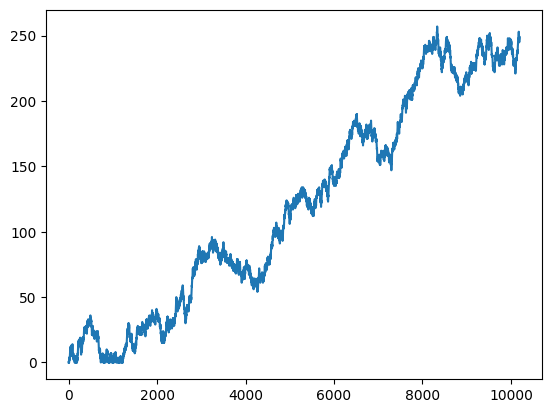

In [26]:
import matplotlib.pyplot as plt

plt.plot(df["in line"].values)